In [2]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.6/13.3 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/13.3 MB 3.0 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/13.3 MB 3.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/13.3 MB 4.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/13.3 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/13.3 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/13.3 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.5/13.3 MB 4.6 MB/s eta 0:00:03
   ---

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

O Prophet é uma ferramenta desenvolvida pelo Facebook para fazer previsões em séries temporais, que são basicamente dados coletados ao longo do tempo, como os preços das ações. É famoso por ser fácil de usar e por funcionar bem mesmo com poucos dados ou com dados que possuem padrões irregulares, o que é comum no mercado de ações.

Vamos usar dados de ações da empresa Johnson & Johnson como exemplo.

Aqui, usamos um comando para baixar os dados. É como se estivéssemos pedindo à internet para nos dar os preços das ações da Johnson & Johnson desde 2020 até o final de 2023. Fácil, né?

In [4]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

Agora, dividimos nossos dados em duas partes: uma para treinar nosso 'adivinho' digital, que é até julho de 2023, e outra para testar nossas previsões, que é o restante do ano.

In [5]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [6]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

O próximo passo é preparar os dados para o nosso adivinho, o Prophet. É como se estivéssemos arrumando os dados para que ele entenda o que estamos perguntando.

Depois, criamos o modelo do Prophet. Aqui, estamos dizendo ao Prophet para considerar padrões semanais e anuais nos dados, mas não diários. E também adicionamos feriados dos EUA, já que eles podem influenciar o preço das ações.

In [7]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

14:55:55 - cmdstanpy - INFO - Chain [1] start processing
14:55:56 - cmdstanpy - INFO - Chain [1] done processing


Agora, a parte mágica! Pedimos ao Prophet para prever o futuro, até o final de 2023. E então, plotamos um gráfico para ver como nossa previsão se compara com os dados reais

In [8]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

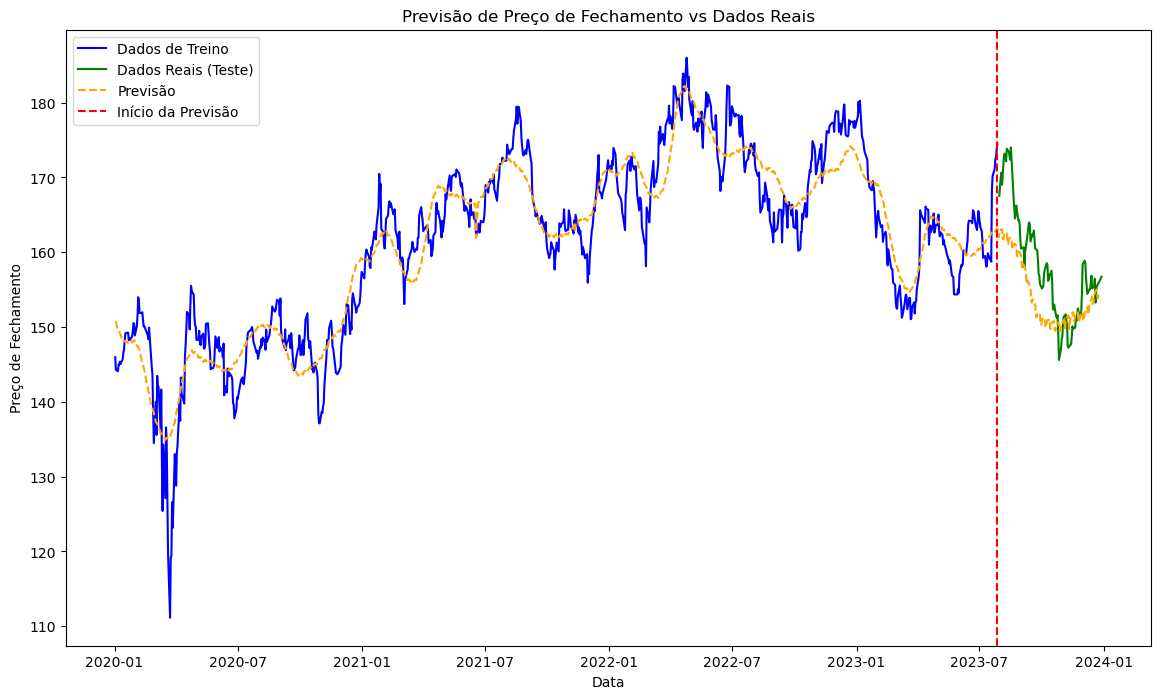

In [9]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()